# HYPERPARAMETER DATABASE
Ashish Kumar    (Kumar.ashi@husky.neu.edu)
Tripti Santani  (santani.t@husky.neu.edu)
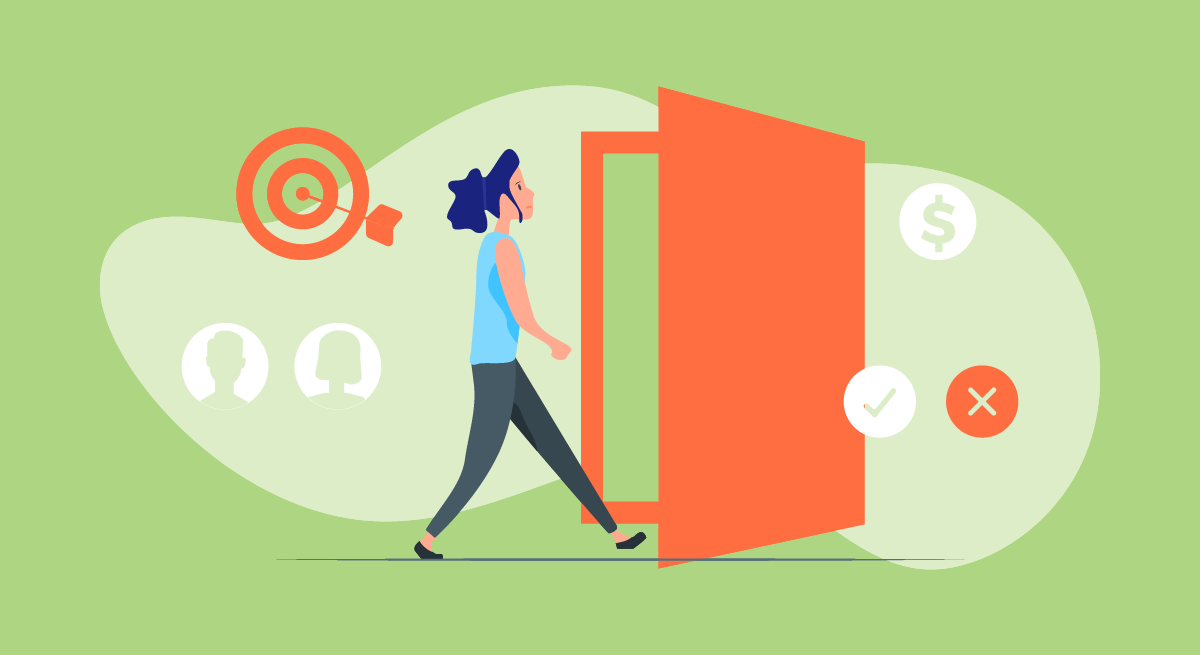

# Project Overview

##  Introduction:

Every scientist and researcher want the best model for the task given the available resources. Effective hyperparameter search is the missing piece of the puzzle that will help us move towards this goal. The objective of the project is to create a hyperparameter database by running millions of hyperparameter values, over thousands of public datasets and calculating the individual conditional expectation of every hyperparameter on the quality of a model.Objective is to choose a set of optimal hyperparameters for a learning algorithm.

## Dataset Introduction:

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

## Attribute Introduction:
- customerID- Customer ID
- gender- Whether the customer is a male or a female
- SeniorCitizen- Whether the customer is a senior citizen or not (1, 0)
- Partner- Whether the customer has a partner or not (Yes, No)
- Dependents- Whether the customer has dependents or not (Yes, No)
- tenure -Number of months the customer has stayed with the company
- PhoneService -Whether the customer has a phone service or not (Yes, No)
- MultipleLines -Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService -Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity -Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup -Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection  -Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport -Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV -Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies -Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract -The contract term of the customer (Month-to-month, One year, Two year)
- Paperless   -BillingWhether the customer has paperless billing or not (Yes, No)
- PaymentMethod -The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges -The amount charged to the customer monthly
- TotalCharges -The total amount charged to the customer
- Churn -Whether the customer churned or not (Yes or No)

Dataset Link: [Predict behavior to retain customers](https://www.kaggle.com/blastchar/telco-customer-churn)

## Analysis of Data:

- Labels of churn are: 1 for Yes and 0 for No. 
- There is no missing values in the data set

## Project Aim:

- 1.Get the leaderboard and save all models on leaderboard in json files for all 5 run time 
- 2.Save metadata for each run time
- 3.Extract and save parameters of all models for every run time
- 4.Find the important hyperparameters for models
- 5.Find the range of hyperparameters for models
- 6.Compare the range of values across the models for different hyperparameters

## Acknowledgement: 

This project work is part of 'AI Skunkworks Project'.

Source: The dataset is taken from Kaggle competition hosted by BlastChar that were analysing Focused customer retention programs

## Project Implementation





In [276]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt             #visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns                      #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py               #visualization
py.init_notebook_mode(connected=True)    #visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# Importing H2O
import time, warnings, h2o, logging, os, sys, psutil, random
from h2o.automl import H2OAutoML


from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
# from __future__ import print_function

import json
import datetime
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Importing the dataset
telcom = pd.read_csv(r"../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
# displaying first 5 rows 
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# overview of the dataset
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [9]:
#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [10]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

# H2O

H2O is an open source predictive analytics platform for data scientists and business analysts who need scalable and fast machine learning.
Unlike traditional analytics tools, H2O provides a combination of extraordinary math and high performance parallel processing with unrivaled ease of use.
H2O intelligently combines the following features to solve today’s most challenging business problems:
 - Best of breed Open Source Technology
 - Easy-to-use WebUI and Familiar Interfaces
 - Data Agnostic Support for all Common Database and File Types
 - Massively scalable Big Data Munging and Analysis
 - Real-time Data Scoring

The H2O python module is not intended as a replacement for other popular machine learning frameworks such as scikit-learn,  pylearn2, and their ilk, but is intended to bring H2O to a wider audience of data and machine learning devotees who work exclusively with Python.

H2O from Python is a tool for rapidly turning over models, doing data munging, and building applications in a fast, scalable environment without any of the mental anguish about parallelism and distribution of work.

In [11]:
#Initialising H2O
pct_memory=0.95
virtual_memory=psutil.virtual_memory()
print("Virtual Memory Size: ",virtual_memory)
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print("Minimum Memory Size: ",min_mem_size)

Virtual Memory Size:  svmem(total=12711006208, available=2678046720, percent=78.9, used=10032959488, free=2678046720)
Minimum Memory Size:  2


In [12]:
# Setting up initial metadata
data_path=None
all_variables=None
test_path=None
target=None
nthreads=1 
min_mem_size= min_mem_size 
classification=False
scale=False
max_models=None    
model_path=None
balance_y=False 
balance_threshold=0.2
name=None 
server_path=None  
analysis=2

In [13]:
# Functions

def alphabet(n):
  alpha='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'    
  str=''
  r=len(alpha)-1   
  while len(str)<n:
    i=random.randint(0,r)
    str+=alpha[i]   
  return str
  
  
def set_meta_data(analysis,run_id,server,data,test,model_path,target,run_time,classification,scale,model,balance,balance_threshold,name,path,nthreads,min_mem_size):
  m_data={}
  m_data['start_time'] = time.time()
  m_data['target']=target
  m_data['server_path']=server
  m_data['data_path']=data 
  m_data['test_path']=test
  m_data['max_models']=model
  m_data['run_time']=run_time
  m_data['run_id'] =run_id
  m_data['scale']=scale
  m_data['classification']=classification
  m_data['scale']=False
  m_data['model_path']=model_path
  m_data['balance']=balance
  m_data['balance_threshold']=balance_threshold
  m_data['project'] =name
  m_data['end_time'] = time.time()
  m_data['execution_time'] = 0.0
  m_data['run_path'] =path
  m_data['nthreads'] = nthreads
  m_data['min_mem_size'] = min_mem_size
  m_data['analysis'] = analysis
  if (analysis==1):
     m_data['Main_Eval_metrix'] = "RMSE"
  else:
     m_data['Main_Eval_metrix'] = "Logloss"
  return m_data


def dict_to_json(dct,n):
  j = json.dumps(dct, indent=4)
  f = open(n, 'w')
  print(j, file=f)
  f.close()
  
  
def stackedensemble(mod):
    coef_norm=None
    try:
      metalearner = h2o.get_model(mod.metalearner()['name'])
      coef_norm=metalearner.coef_norm()
    except:
      pass        
    return coef_norm

def stackedensemble_df(df):
    bm_algo={ 'GBM': None,'GLM': None,'DRF': None,'XRT': None,'Dee': None}
    for index, row in df.iterrows():
      if len(row['model_id'])>3:
        key=row['model_id'][0:3]
        if key in bm_algo:
          if bm_algo[key] is None:
                bm_algo[key]=row['model_id']
    bm=list(bm_algo.values()) 
    bm=list(filter(None.__ne__, bm))             
    return bm

def se_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['auc']=modl.auc()   
    d['roc']=modl.roc()
    d['mse']=modl.mse()   
    d['null_degrees_of_freedom']=modl.null_degrees_of_freedom()
    d['null_deviance']=modl.null_deviance()
    d['residual_degrees_of_freedom']=modl.residual_degrees_of_freedom()   
    d['residual_deviance']=modl.residual_deviance()
    d['rmse']=modl.rmse()
    return d

def get_model_by_algo(algo,models_dict):
    mod=None
    mod_id=None    
    for m in list(models_dict.keys()):
        if m[0:3]==algo:
            mod_id=m
            mod=h2o.get_model(m)      
    return mod,mod_id     
    
    
def gbm_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d
    
    
def dl_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d
    
    
def drf_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    d['roc']=modl.roc()      
    return d
    
def xrt_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    d['roc']=modl.roc()      
    return d
    
    
def glm_stats(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['coef']=modl.coef()  
    d['coef_norm']=modl.coef_norm()      
    return d
    
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d
    
def impute_missing_values(df, x, scal=False):
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in x:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    _ = df[reals].impute(method='mean')
    _ = df[ints].impute(method='median')
    if scal:
        df[reals] = df[reals].scale()
        df[ints] = df[ints].scale()    
    return


def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x
    
def get_all_variables_csv(i):
    ivd={}
    try:
      iv = pd.read_csv(i,header=None)
    except:
      sys.exit(1)    
    col=iv.values.tolist()[0]
    dt=iv.values.tolist()[1]
    i=0
    for c in col:
      ivd[c.strip()]=dt[i].strip()
      i+=1        
    return ivd
    
    

def check_all_variables(df,dct,y=None):     
    targ=list(dct.keys())     
    for key, val in df.types.items():
        if key in targ:
          if dct[key] not in ['real','int','enum']:                      
            targ.remove(key)  
    for key, val in df.types.items():
        if key in targ:            
          if dct[key] != val:
            print('convert ',key,' ',dct[key],' ',val)
            if dct[key]=='enum':
                try:
                  df[key] = df[key].asfactor() 
                except:
                  targ.remove(key)                 
            if dct[key]=='int': 
                try:                
                  df[key] = df[key].asnumeric() 
                except:
                  targ.remove(key)                  
            if dct[key]=='real':
                try:                
                  df[key] = df[key].asnumeric()  
                except:
                  targ.remove(key)                  
    if y is None:
      y=df.columns[-1] 
    if y in targ:
      targ.remove(y)
    else:
      y=targ.pop()            
    return targ    
    
def predictions(mod,data,run_id):
    test = h2o.import_file(data)
    mod_perf=mod_best.model_performance(test)
              
    stats_test={}
    stats_test=model_performance_stats(mod_perf)

    n=run_id+'_test_stats.json'
    dict_to_json(stats_test,n) 

    try:    
      cf=mod_perf.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
      cf_df=cf[0].table.as_data_frame()
      cf_df.to_csv(run_id+'_test_confusion_matrix.csv')
    except:
      pass

    predictions = mod_best.predict(test)
    predictions_df=test.cbind(predictions).as_data_frame() 
    predictions_df.to_csv(run_id+'_predictions.csv')
    return

def predictions_test(mod,test,run_id):
    mod_perf=mod_best.model_performance(test)          
    stats_test={}
    stats_test=model_performance_stats(mod_perf)
    n=run_id+'_test_stats.json'
    dict_to_json(stats_test,n) 
    try:
      cf=mod_perf.confusion_matrix()
#      cf=mod_perf.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
      cf_df=cf.table.as_data_frame()
      cf_df.to_csv(run_id+'_test_confusion_matrix.csv')
    except:
      pass
    predictions = mod_best.predict(test)    
    predictions_df=test.cbind(predictions).as_data_frame() 
    predictions_df.to_csv(run_id+'_predictions.csv')
    return predictions

def check_X(x,df):
    for name in x:
        if name not in df.columns:
          x.remove(name)  
    return x    
    
    
def get_stacked_ensemble(lst):
    se=None
    for model in model_set:
      if 'BestOfFamily' in model:
        se=model
    if se is None:     
      for model in model_set:
        if 'AllModels'in model:
          se=model           
    return se       
    
def get_variables_types(df):
    d={}
    for key, val in df.types.items():
        d[key]=val           
    return d    

def Variable_imp_list(modl):
    d={}
    d['algo']=modl.algo
    d['model_id']=modl.model_id   
    d['varimp']=modl.varimp()  
    return d

#  End Functions

In [14]:
# Initializing all_variable to None which later will help us in storing the predictors
all_variables=None

In [54]:
def Get_Hyperparameters(df_pandaFrame):
    
    GBM_list=['Model_name','Leaderboard_rank','learn_rate','learn_rate_annealing','max_abs_leafnode_pred','pred_noise_bandwidth','distribution','tweedie_power','quantile_alpha','huber_alpha','categorical_encoding','max_depth','sample_rate','col_sample_rate','ntrees','nfolds']
    df_gbm = pd.DataFrame(columns=GBM_list)


    GLM_list=['Model_name','Leaderboard_rank','nfolds','seed','tweedie_variance_power','tweedie_link_power','alpha','lambda','missing_values_handling','standardize']
    df_glm = pd.DataFrame(columns=GLM_list)

    # DRF and XRT are the same
    DRF_list=['Model_name','Leaderboard_rank','nfolds','seed','mtries','categorical_encoding']
    df_drf = pd.DataFrame(columns=DRF_list)

    Deeplearn_list=['Model_name','Leaderboard_rank','balance_classes','categorical_encoding','class_sampling_factors','distribution','huber_alpha','max_after_balance_size','max_runtime_secs','missing_values_handling','model_id','quantile_alpha','seed','standardize','stopping_metric','stopping_rounds','stopping_tolerance','tweedie_power']
    df_Deeplearn = pd.DataFrame(columns=Deeplearn_list)

    count=0
    cnt=0
    
    rows_list = []
    for rows in df_pandaFrame.iterrows():

        mod_best1=h2o.get_model(model_set[count])
        count=count+1
        hy_parameter = mod_best1.params

        if (mod_best1.algo == 'gbm' ):
            df_gbm=df_gbm.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'learn_rate':hy_parameter['learn_rate']['actual'],
                                    'balance_classes' :hy_parameter['balance_classes']['actual'],
                                    'max_depth':hy_parameter['max_depth']['actual'],
                                    'min_rows' :hy_parameter['min_rows']['actual'],
                                    'class_sampling_factors' :hy_parameter['class_sampling_factors']['actual'],
                                    'stopping_tolerance' :hy_parameter['stopping_tolerance']['actual'],
                                    'sample_rate': hy_parameter['sample_rate']['actual'],
                                    'stopping_metric' :hy_parameter['stopping_metric']['actual'],
                                    'stopping_rounds' :hy_parameter['stopping_rounds']['actual'],
                                    'sample_rate_per_class' :hy_parameter['sample_rate_per_class']['actual'],
                                    'col_sample_rate':hy_parameter['col_sample_rate']['actual'],
                                    'max_runtime_secs' :hy_parameter['max_runtime_secs']['actual'],
                                    'col_sample_rate_change_per_level' :hy_parameter['col_sample_rate_change_per_level']['actual'],
                                    'col_sample_rate_per_tree' :hy_parameter['col_sample_rate_per_tree']['actual'],
                                    'min_split_improvement' :hy_parameter['min_split_improvement']['actual'],
                                    'model_id' :hy_parameter['model_id']['actual'],
                                    'seed' :hy_parameter['seed']['actual'],
                                    'nbins' :hy_parameter['nbins']['actual'],
                                    'nbins_cats' :hy_parameter['nbins_cats']['actual'],
                                    'nbins_top_level' :hy_parameter['nbins_top_level']['actual'],
                                    'histogram_type' :hy_parameter['histogram_type']['actual'],
                                    'max_after_balance_size' :hy_parameter['max_after_balance_size']['actual'],
                                    'ntrees':hy_parameter['ntrees']['actual'],
                                    'learn_rate_annealing' :hy_parameter['learn_rate_annealing']['actual'],
                                    'max_abs_leafnode_pred' :hy_parameter['max_abs_leafnode_pred']['actual'],
                                    'pred_noise_bandwidth' :hy_parameter['pred_noise_bandwidth']['actual'],
                                    'tweedie_power' :hy_parameter['tweedie_power']['actual'],
                                    'quantile_alpha':hy_parameter['quantile_alpha']['actual'],
                                    'huber_alpha':hy_parameter['huber_alpha']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'glm'):
            df_glm=df_glm.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'alpha': hy_parameter['alpha']['actual'],
                                    'balance_classes' : hy_parameter['balance_classes']['actual'],
                                    'lambda' : hy_parameter['lambda']['actual'],
                                    'max_runtime_secs' :hy_parameter['max_runtime_secs']['actual'],
                                    'missing_values_handling' :hy_parameter['missing_values_handling']['actual'],
                                    'model_id' :hy_parameter['model_id']['actual'],
                                    'seed' :hy_parameter['seed']['actual'],
                                    'standardize' :hy_parameter['standardize']['actual'],
                                    'tweedie_link_power' :hy_parameter['tweedie_link_power']['actual'],
                                    'tweedie_variance_power' :hy_parameter['tweedie_variance_power']['actual'],
                                    'max_after_balance_size' :hy_parameter['max_after_balance_size']['actual'],
                                    'max_iterations' :hy_parameter['max_iterations']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'drf'):
            df_drf=df_drf.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'balance_classes' : hy_parameter['balance_classes']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'mtries':hy_parameter['mtries']['actual'],
                                    'class_sampling_factors' :hy_parameter['class_sampling_factors']['actual'],
                                    'col_sample_rate_change_per_level' :hy_parameter['col_sample_rate_change_per_level']['actual'],
                                    'col_sample_rate_per_tree' :hy_parameter['col_sample_rate_per_tree']['actual'],
                                    'histogram_type' :hy_parameter['histogram_type']['actual'],
                                    'max_after_balance_size' :hy_parameter['max_after_balance_size']['actual'],
                                    'max_depth':hy_parameter['max_depth']['actual'],
                                    'max_runtime_secs' :hy_parameter['max_runtime_secs']['actual'],
                                    'min_rows' :hy_parameter['min_rows']['actual'],
                                    'min_split_improvement' :hy_parameter['min_split_improvement']['actual'],
                                    'model_id' :hy_parameter['model_id']['actual'],
                                    'nbins' :hy_parameter['nbins']['actual'],
                                    'nbins_cats' :hy_parameter['nbins_cats']['actual'],
                                    'nbins_top_level' :hy_parameter['nbins_top_level']['actual'],
                                    'ntrees':hy_parameter['ntrees']['actual'],
                                    'sample_rate': hy_parameter['sample_rate']['actual'],
                                    'stopping_metric' :hy_parameter['stopping_metric']['actual'],
                                    'sample_rate_per_class' :hy_parameter['sample_rate_per_class']['actual'],
                                    'seed' :hy_parameter['seed']['actual'],
                                    'stopping_metric' :hy_parameter['stopping_metric']['actual'],
                                    'stopping_rounds' :hy_parameter['stopping_rounds']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']},
                                 ignore_index=True)

        elif (mod_best1.algo == 'deeplearning'):
            df_Deeplearn=df_Deeplearn.append({'Model_name':mod_best1.model_id,
                                    'Leaderboard_rank':count,
                                    'Logloss':mod_best1.logloss(xval=True),
                                    'balance_classes': hy_parameter['balance_classes']['actual'],
                                    'max_after_balance_size': hy_parameter['max_after_balance_size']['actual'],
                                    'class_sampling_factors':hy_parameter['class_sampling_factors']['actual'],
                                    'activation':hy_parameter['activation']['actual'],
                                    'hidden':hy_parameter['hidden']['actual'],
                                    'epochs':hy_parameter['epochs']['actual'],
                                    'train_samples_per_iteration':hy_parameter['train_samples_per_iteration']['actual'],
                                    'target_ratio_comm_to_comp':hy_parameter['target_ratio_comm_to_comp']['actual'],
                                    'seed':hy_parameter['seed']['actual'],
                                    'adaptive_rate':hy_parameter['adaptive_rate']['actual'],
                                    'rho':hy_parameter['rho']['actual'],
                                    'epsilon':hy_parameter['epsilon']['actual'],
                                    'rate':hy_parameter['rate']['actual'],
                                    'rate_annealing':hy_parameter['rate_annealing']['actual'],
                                    'rate_decay':hy_parameter['rate_decay']['actual'],
                                    'momentum_start':hy_parameter['momentum_start']['actual'],
                                    'momentum_ramp':hy_parameter['momentum_ramp']['actual'],
                                    'momentum_stable':hy_parameter['momentum_stable']['actual'],                                          
                                    'nesterov_accelerated_gradient':hy_parameter['nesterov_accelerated_gradient']['actual'],
                                    'input_dropout_ratio':hy_parameter['input_dropout_ratio']['actual'],
                                    'hidden_dropout_ratios':hy_parameter['hidden_dropout_ratios']['actual'],
                                    'l1':hy_parameter['l1']['actual'],
                                    'initial_weight_distribution':hy_parameter['initial_weight_distribution']['actual'],
                                    'initial_weight_scale':hy_parameter['initial_weight_scale']['actual'],                                          
                                    'l2':hy_parameter['l2']['actual'],
                                    'max_w2':hy_parameter['max_w2']['actual'],
                                    'loss':hy_parameter['loss']['actual'],
                                    'initial_weights':hy_parameter['initial_weights']['actual'],
                                    'initial_biases':hy_parameter['initial_biases']['actual'],
                                    'distribution':hy_parameter['distribution']['actual'],                                          
                                    'tweedie_power':hy_parameter['tweedie_power']['actual'],
                                    'quantile_alpha':hy_parameter['quantile_alpha']['actual'],
                                    'score_interval':hy_parameter['score_interval']['actual'],
                                    'score_training_samples':hy_parameter['score_training_samples']['actual'],
                                    'score_validation_samples':hy_parameter['score_validation_samples']['actual'],
                                    'score_duty_cycle':hy_parameter['score_duty_cycle']['actual'],
                                    'classification_stop':hy_parameter['classification_stop']['actual'],
                                    'regression_stop':hy_parameter['regression_stop']['actual'],
                                    'score_validation_sampling':hy_parameter['score_validation_sampling']['actual'],                                          
                                    'overwrite_with_best_model':hy_parameter['overwrite_with_best_model']['actual'],
                                    'use_all_factor_levels':hy_parameter['use_all_factor_levels']['actual'],
                                    'standardize':hy_parameter['standardize']['actual'],
                                    'fast_mode':hy_parameter['fast_mode']['actual'],
                                    'variable_importances':hy_parameter['variable_importances']['actual'],                                          
                                    'fast_mode':hy_parameter['fast_mode']['actual'],
                                    'force_load_balance':hy_parameter['force_load_balance']['actual'],
                                    'replicate_training_data':hy_parameter['replicate_training_data']['actual'],
                                    'shuffle_training_data':hy_parameter['shuffle_training_data']['actual'],
                                    'missing_values_handling':hy_parameter['missing_values_handling']['actual'],
                                    'sparse':hy_parameter['sparse']['actual'],
                                    'col_major':hy_parameter['col_major']['actual'],
                                    'average_activation':hy_parameter['average_activation']['actual'],
                                    'sparsity_beta':hy_parameter['sparsity_beta']['actual'],                                          
                                    'max_categorical_features':hy_parameter['max_categorical_features']['actual'],
                                    'reproducible':hy_parameter['reproducible']['actual'],
                                    'elastic_averaging':hy_parameter['elastic_averaging']['actual'],
                                    'elastic_averaging_moving_rate':hy_parameter['elastic_averaging_moving_rate']['actual'],
                                    'elastic_averaging_regularization':hy_parameter['elastic_averaging_regularization']['actual'],
                                    'categorical_encoding':hy_parameter['categorical_encoding']['actual']

                                             },
                                 ignore_index=True)

    return df_gbm,df_glm,df_drf,df_Deeplearn

In [16]:
# Function to determine range of hyperparameters
def get_rang(dataFrame):
    df_Range=pd.DataFrame(columns=['Hyperparameter_name','Min_value','Max_value'])
    for columns in dataFrame:
        if(columns!= 'Model_name' and columns!='Leaderboard_rank' and columns!='RMSE_VAL'):
            df_Range=df_Range.append({'Hyperparameter_name':columns,
                                        'Min_value':dataFrame[columns].min(),
                                        'Max_value':dataFrame[columns].max()
                                        },
                                     ignore_index=True)
        
    return df_Range

In [17]:
# Connect to a cluster
port_no=random.randint(5555,55555)

try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:13562..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from C:\Users\Tripti Santani\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\TRIPTI~1\AppData\Local\Temp\tmpjqkeaazr
  JVM stdout: C:\Users\TRIPTI~1\AppData\Local\Temp\tmpjqkeaazr\h2o_Tripti_Santani_started_from_python.out
  JVM stderr: C:\Users\TRIPTI~1\AppData\Local\Temp\tmpjqkeaazr\h2o_Tripti_Santani_started_from_python.err
  Server is running at http://127.0.0.1:13562
Connecting to H2O server at http://127.0.0.1:13562... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.6
H2O cluster version age:,1 month and 12 days
H2O cluster name:,H2O_from_python_Tripti_Santani_7nq4v2
H2O cluster total nodes:,1
H2O cluster free memory:,2.632 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [18]:
# Loading the preprocessed data from pandas dataframe into H2O dataframe
H2O_df=h2o.H2OFrame(telcom)
H2O_df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
7590-VHVEG,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.28025,-1.16169,-0.994194
5575-GNVDE,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0.0643027,-0.260878,-0.17374
3668-QPYBK,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-1.2395,-0.363923,-0.959649
7795-CFOCW,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0.512486,-0.74785,-0.195248
9237-HQITU,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.2395,0.196178,-0.940457
9305-CDSKC,0,0,0,0,1,0,0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,-0.99504,1.15849,-0.645369
1452-KIOVK,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,-0.424625,0.807802,-0.147313
6713-OKOMC,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-0.913552,-1.16502,-0.874169
7892-POOKP,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,-0.180161,1.32968,0.336516
6388-TABGU,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1.20513,-0.28747,0.531476


In [19]:
H2O_df.describe()

Rows:7032
Cols:35




,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
type,string,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real
mins,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.2802480369298874,-1.5472830783322116,-0.999069209213556
mean,NaN,0.5046928327645052,0.16240045506257111,0.4825085324232082,0.2984926052332196,0.9032992036405005,0.286547212741752,0.34485210466439137,0.3438566552901024,0.2901023890784983,0.3843856655290102,0.3883674630261661,0.5927189988623436,0.26578498293515357,0.48137087599544937,0.09670079635949944,0.42192832764505117,0.3435722411831627,0.4402730375426621,0.2161547212741752,0.551052332195677,0.20932878270762229,0.2396188850967008,0.21928327645051193,0.21629692832764505,0.3363196814562002,0.22810011376564276,0.30930034129692835,0.14562002275312855,0.22667804323094426,0.11831626848691695,0.20008532423208192,-1.1066993675645787e-16,3.7161029461940664e-17,-1.1454595952309354e-16
maxs,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.6125732136881423,1.7933814803098411,2.8242613633457254
sigma,NaN,0.5000135308251333,0.3688439967571051,0.4997294886907991,0.45762927299583706,0.2955709320291018,0.4521802563790777,0.47535383017123434,0.4750277308912676,0.45384169447176065,0.4864843074333494,0.48741354217682575,0.49136292225652883,0.44178171135255484,0.4996883660837623,0.2955709320291018,0.4939023222194599,0.4749341352656062,0.49645517361249863,0.411650283101074,0.49742220045394525,0.40685843177863473,0.42688123529878264,0.4137903698282622,0.4117483168573753,0.472483332716697,0.41963733614522264,0.4622380606375002,0.35274994955281636,0.41871235913714505,0.3230052103242058,0.4000924279512421,1.0000711111112006,1.000071111111201,1.0000711111112022
zeros,0,3483,5890,3639,4933,680,5017,4607,4614,4992,4329,4301,2864,5163,3647,6352,4065,4616,3936,5512,3157,5560,5347,5490,5511,4667,5428,4857,6008,5438,6200,5625,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7590-VHVEG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.2802480369298874,-1.1616939352451685,-0.9941940877241976
1,5575-GNVDE,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.06430268518835193,-0.2608779199297493,-0.17373981825040724
2,3668-QPYBK,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.2395040756535771,-0.3639232943754246,-0.9596491092068434


# 1. H2O Implementation for runtime 333

In [20]:
# Initializing the server path 
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print("Run id:"+run_id)

Run id:R0Dt1vm4I


In [21]:
# Creating zip file for a particular Run_id
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Downloads\R0Dt1vm4I\logs R0Dt1vm4I_autoh2o_log.zip


In [22]:
run_time=333

In [23]:
if analysis == 1:
 classification=False
elif analysis == 2:
 classification=True

In [24]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556274183.8142664, 'target': None, 'server_path': 'C:\\Users\\Tripti Santani\\Downloads', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 333, 'run_id': 'R0Dt1vm4I', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556274183.8142664, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Downloads\\R0Dt1vm4I', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [25]:
# dependent variable
# assign target for classification or regression
if target==None:
 target=H2O_df.columns[13]   
y = target

In [26]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [27]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [29]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [30]:
ok=check_y(y,H2O_df)
if not ok:
   print(ok)

In [31]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

[['0', '1']]


In [32]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [33]:
model_start_time = time.time()

# AutoML: Automatic Machine Learning
H2O's AutoML is used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit which in this python is the run_time.

In [34]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [35]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [36]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [37]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190426_062331,0.849774,0.419341,0.242931,0.367295,0.134906
StackedEnsemble_AllModels_AutoML_20190426_062331,0.849075,0.41884,0.234124,0.367347,0.134944
GBM_5_AutoML_20190426_062331,0.848754,0.412164,0.232566,0.366,0.133956
GBM_grid_1_AutoML_20190426_062331_model_3,0.848662,0.413389,0.235445,0.366081,0.134015
GBM_grid_1_AutoML_20190426_062331_model_4,0.846897,0.432727,0.238131,0.372704,0.138908
GBM_grid_1_AutoML_20190426_062331_model_17,0.846787,0.479409,0.229768,0.394188,0.155384
GLM_grid_1_AutoML_20190426_062331_model_1,0.846019,0.415778,0.235024,0.367361,0.134954
GBM_grid_1_AutoML_20190426_062331_model_6,0.845463,0.443904,0.233155,0.378099,0.142959
GBM_grid_1_AutoML_20190426_062331_model_13,0.844699,0.417208,0.229444,0.36855,0.135829
GBM_grid_1_AutoML_20190426_062331_model_8,0.842493,0.419825,0.239444,0.369711,0.136686


In [38]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [39]:
meta_data['mod_best_algo']

'stackedensemble'

In [40]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [41]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)


In [42]:
#Getting models for stacked ensemble
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)

In [43]:
meta_data['models']=bm

In [44]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_062331',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_062331'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_5_sid_a8d3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_5_sid_a8d3'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Churn',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Model>

In [50]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [51]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Contract_Month-to-month,760.058289,1.000000,0.295374
1,tenure,421.066925,0.553993,0.163635
2,InternetService_Fiber optic,259.032623,0.340806,0.100665
3,MonthlyCharges,254.001038,0.334186,0.098710
4,tenure_group_Tenure_0-12,215.121246,0.283033,0.083601
5,TotalCharges,140.344391,0.184650,0.054541
6,PaymentMethod_Electronic check,91.689651,0.120635,0.035632
7,InternetService_No,49.825951,0.065555,0.019363
8,PaperlessBilling,43.824417,0.057659,0.017031
9,OnlineSecurity,36.536728,0.048071,0.014199


In [52]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0                     Contract_Month-to-month
1                                      tenure
2                 InternetService_Fiber optic
3                              MonthlyCharges
4                    tenure_group_Tenure_0-12
5                                TotalCharges
6              PaymentMethod_Electronic check
7                          InternetService_No
8                            PaperlessBilling
9                              OnlineSecurity
10                                     gender
11                           MultipleLines_No
12                                TechSupport
13                          Contract_Two year
14                              SeniorCitizen
15                        InternetService_DSL
16                            StreamingMovies
17                               OnlineBackup
18                                StreamingTV
19                          Contract_One year
20             MultipleLines_No phone service
21                           Devic

In [53]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [55]:
df_gbm1,df_glm1,df_drf1,df_Deeplearn1=Get_Hyperparameters(df_pandaFrame)

In [56]:
df_gbm1

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_5_AutoML_20190426_062331,3,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.691949e+18,logloss,0.0,0.011925
1,GBM_grid_1_AutoML_20190426_062331_model_3,4,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.070052e+18,logloss,0.0,0.011925
2,GBM_grid_1_AutoML_20190426_062331_model_4,5,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.812416e+17,logloss,0.0,0.011925
3,GBM_grid_1_AutoML_20190426_062331_model_17,6,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.819309e+17,logloss,0.0,0.011925
4,GBM_grid_1_AutoML_20190426_062331_model_6,8,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,9.185247e+18,logloss,0.0,0.011925
5,GBM_grid_1_AutoML_20190426_062331_model_13,9,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.726473e+18,logloss,0.0,0.011925
6,GBM_grid_1_AutoML_20190426_062331_model_8,10,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.730352e+18,logloss,0.0,0.011925
7,GBM_1_AutoML_20190426_062331,11,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.691949e+18,logloss,0.0,0.011925
8,GBM_2_AutoML_20190426_062331,12,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.691949e+18,logloss,0.0,0.011925
9,GBM_grid_1_AutoML_20190426_062331_model_5,13,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-6.941114e+18,logloss,0.0,0.011925


In [57]:
df_glm1

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_062331_model_1,7,NaN,3154823117399304444,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[17.87038027303149, 11.097808907597305, 6.8919...",MeanImputation,True,0.415778,0.0,5.0,300.0,4.666667,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [58]:
df_drf1

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,DRF_1_AutoML_20190426_062331,24,NaN,-2021459974484722361,-1,AUTO,0.565275,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,AUTO,0.0
1,XRT_1_AutoML_20190426_062331,27,NaN,7601388580792784631,-1,AUTO,0.606045,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,32.0,0.632,None,logloss,0.0


In [59]:
df_Deeplearn1

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_062331_mod...,16,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_1_AutoML_20190426_062331,20,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_grid_1_AutoML_20190426_062331_mod...,22,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [60]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm1.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm1.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf1.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn1.to_json(Deeplearn_para)

In [61]:
# Abstracting the best model from the leaderboard
ml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [62]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  stackedensemble
RMSE of best iteration:  0.3487890176067511
RMSE on CV:  0.3672950226703156


In [63]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 2. H2O Implementation for runtime 555

In [64]:
# Initializing the server path 
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print("Run id:"+run_id)

Run id:wwuCBptK9


In [65]:
# Creating zip file for a particular Run_id
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Downloads\wwuCBptK9\logs wwuCBptK9_autoh2o_log.zip


In [66]:
run_time=555

In [67]:
if analysis == 1:
 classification=False
elif analysis == 2:
 classification=True

In [68]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556274836.2765996, 'target': 'Churn', 'server_path': 'C:\\Users\\Tripti Santani\\Downloads', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 555, 'run_id': 'wwuCBptK9', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556274836.2765996, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Downloads\\wwuCBptK9', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [69]:
# dependent variable
# assign target for classification or regression
if target==None:
 target=H2O_df.columns[13]   
y = target

In [70]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [71]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [72]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [73]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [74]:
ok=check_y(y,H2O_df)
if not ok:
   print(ok)

In [75]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

[['0', '1']]


In [76]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [77]:
model_start_time = time.time()

In [78]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [79]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [80]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [81]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190425_162136,0.850241,0.418709,0.236695,0.367081,0.134749
XGBoost_3_AutoML_20190425_162136,0.849087,0.41311,0.238503,0.366073,0.13401
StackedEnsemble_AllModels_AutoML_20190425_162136,0.84894,0.419108,0.240143,0.367477,0.135039
XGBoost_grid_1_AutoML_20190425_162136_model_5,0.848873,0.415273,0.232176,0.366079,0.134014
GBM_grid_1_AutoML_20190425_162136_model_21,0.848692,0.413343,0.233223,0.366323,0.134193
XGBoost_grid_1_AutoML_20190425_162136_model_8,0.848463,0.416215,0.231428,0.366385,0.134238
GBM_grid_1_AutoML_20190425_162136_model_8,0.848153,0.434682,0.228787,0.373154,0.139244
XGBoost_grid_1_AutoML_20190425_162136_model_2,0.848049,0.415626,0.239955,0.366337,0.134203
GBM_grid_1_AutoML_20190425_162136_model_32,0.847873,0.41303,0.232454,0.366463,0.134295
GBM_grid_1_AutoML_20190425_162136_model_23,0.847722,0.431957,0.23526,0.372435,0.138708


In [81]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [82]:
meta_data['mod_best_algo']

'stackedensemble'

In [83]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [84]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)


In [85]:
#Getting models for stacked ensemble
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)

In [86]:
meta_data['models']=bm

In [87]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_063444',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_063444'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_10_sid_a8d3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_10_sid_a8d3'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Churn',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Mode

In [88]:
store_val=Variable_imp_list(h2o.get_model(model_set[1]))

In [89]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Contract_Month-to-month,1098.155640,1.000000,0.478415
1,tenure,391.049713,0.356097,0.170362
2,InternetService_Fiber optic,235.489578,0.214441,0.102592
3,PaymentMethod_Electronic check,118.825035,0.108204,0.051766
4,MonthlyCharges,94.868294,0.086389,0.041330
5,TotalCharges,81.109268,0.073860,0.035335
6,InternetService_No,47.051815,0.042846,0.020498
7,PaperlessBilling,42.979519,0.039138,0.018724
8,OnlineSecurity,27.975765,0.025475,0.012188
9,MultipleLines_No,27.297871,0.024858,0.011892


In [90]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0                     Contract_Month-to-month
1                                      tenure
2                 InternetService_Fiber optic
3              PaymentMethod_Electronic check
4                              MonthlyCharges
5                                TotalCharges
6                          InternetService_No
7                            PaperlessBilling
8                              OnlineSecurity
9                            MultipleLines_No
10                          Contract_One year
11                                TechSupport
12                            StreamingMovies
13                              SeniorCitizen
14                               PhoneService
15                                StreamingTV
16                          Contract_Two year
17                          MultipleLines_Yes
18                        InternetService_DSL
19                               OnlineBackup
20                                     gender
21                                

In [91]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [92]:
df_gbm2,df_glm2,df_drf2,df_Deeplearn2=Get_Hyperparameters(df_pandaFrame)

In [93]:
df_gbm2

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_063444_model_23,2,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-6.522625e+18,logloss,0.0,0.011925
1,GBM_grid_1_AutoML_20190426_063444_model_18,4,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,7.080765e+18,logloss,0.0,0.011925
2,GBM_grid_1_AutoML_20190426_063444_model_1,5,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.161078e+18,logloss,0.0,0.011925
3,GBM_grid_1_AutoML_20190426_063444_model_20,6,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-7.239906e+18,logloss,0.0,0.011925
4,GBM_grid_1_AutoML_20190426_063444_model_24,7,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.098970e+18,logloss,0.0,0.011925
5,GBM_grid_1_AutoML_20190426_063444_model_8,8,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-9.770293e+17,logloss,0.0,0.011925
6,GBM_grid_1_AutoML_20190426_063444_model_14,9,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.143075e+18,logloss,0.0,0.011925
7,GBM_5_AutoML_20190426_063444,10,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.547457e+18,logloss,0.0,0.011925
8,GBM_grid_1_AutoML_20190426_063444_model_25,11,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,4.143803e+18,logloss,0.0,0.011925
9,GBM_grid_1_AutoML_20190426_063444_model_28,12,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,4.778457e+18,logloss,0.0,0.011925


In [94]:
df_glm2

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_063444_model_1,13,NaN,-3839070723500668161,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[17.87038027303149, 11.097808907597305, 6.8919...",MeanImputation,True,0.415778,0.0,5.0,300.0,7.833333,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [265]:
df_drf2

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding


In [96]:
df_Deeplearn2

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_063444_mod...,19,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_1_AutoML_20190426_063444,29,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [97]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm2.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm2.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf2.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn2.to_json(Deeplearn_para)

In [98]:
# Abstracting the best model from the leaderboard
ml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [99]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  stackedensemble
RMSE of best iteration:  0.3604791450043937
RMSE on CV:  0.3673044521395291


In [100]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 3. H2O Implementation for runtime 777

In [101]:
# Initializing the server path 
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print("Run id:"+run_id)

Run id:fePV9QlMi


In [102]:
# Creating zip file for a particular Run_id
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Downloads\fePV9QlMi\logs fePV9QlMi_autoh2o_log.zip


In [103]:
run_time=777

In [104]:
if analysis == 1:
 classification=False
elif analysis == 2:
 classification=True

In [105]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556275911.4457734, 'target': 'Churn', 'server_path': 'C:\\Users\\Tripti Santani\\Downloads', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 777, 'run_id': 'fePV9QlMi', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556275911.4457734, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Downloads\\fePV9QlMi', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [106]:
# dependent variable
# assign target for classification or regression
if target==None:
 target=H2O_df.columns[13]   
y = target

In [107]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [108]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [109]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [110]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [111]:
ok=check_y(y,H2O_df)
if not ok:
   print(ok)

In [112]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

[['0', '1']]


In [113]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [114]:
model_start_time = time.time()

In [115]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [116]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [117]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [118]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_20190426_065209_model_5,0.850091,0.411713,0.238958,0.365371,0.133496
StackedEnsemble_BestOfFamily_AutoML_20190426_065209,0.850035,0.419046,0.241114,0.367105,0.134766
StackedEnsemble_AllModels_AutoML_20190426_065209,0.849287,0.419169,0.231554,0.367343,0.134941
GBM_grid_1_AutoML_20190426_065209_model_15,0.849048,0.412501,0.234254,0.365884,0.133871
GBM_grid_1_AutoML_20190426_065209_model_4,0.849018,0.412285,0.238533,0.365642,0.133694
GBM_grid_1_AutoML_20190426_065209_model_13,0.848026,0.413393,0.235339,0.366307,0.134181
GBM_grid_1_AutoML_20190426_065209_model_14,0.848021,0.431011,0.231928,0.371918,0.138323
GBM_grid_1_AutoML_20190426_065209_model_10,0.847737,0.432397,0.234198,0.372598,0.138829
GBM_5_AutoML_20190426_065209,0.847657,0.413663,0.238197,0.366746,0.134503
GBM_grid_1_AutoML_20190426_065209_model_7,0.84733,0.413788,0.231111,0.366903,0.134618


In [119]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [120]:
meta_data['mod_best_algo']

'gbm'

In [121]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [122]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)


In [123]:
#Getting models for stacked ensemble
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)

In [124]:
meta_data['models']=bm

In [125]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_grid_1_AutoML_20190426_065209_model_5',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_grid_1_AutoML_20190426_065209_model_5'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_15_sid_a8d3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_15_sid_a8d3'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 5},
 

In [130]:
store_val=Variable_imp_list(h2o.get_model(model_set[0]))

In [131]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Contract_Month-to-month,736.300110,1.000000,0.187587
1,tenure,705.679260,0.958413,0.179786
2,InternetService_Fiber optic,549.019897,0.745647,0.139874
3,TotalCharges,413.255646,0.561260,0.105285
4,MonthlyCharges,260.732178,0.354111,0.066427
5,PaymentMethod_Electronic check,220.385696,0.299315,0.056148
6,tenure_group_Tenure_0-12,181.409836,0.246380,0.046218
7,InternetService_No,146.729095,0.199279,0.037382
8,Contract_Two year,129.003815,0.175205,0.032866
9,OnlineSecurity,70.957283,0.096370,0.018078


In [132]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0                     Contract_Month-to-month
1                                      tenure
2                 InternetService_Fiber optic
3                                TotalCharges
4                              MonthlyCharges
5              PaymentMethod_Electronic check
6                    tenure_group_Tenure_0-12
7                          InternetService_No
8                           Contract_Two year
9                              OnlineSecurity
10                           PaperlessBilling
11                                TechSupport
12                        InternetService_DSL
13                              SeniorCitizen
14                           MultipleLines_No
15                            StreamingMovies
16                                     gender
17                                StreamingTV
18                          MultipleLines_Yes
19                          Contract_One year
20                  tenure_group_Tenure_gt_60
21                               O

In [133]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [134]:
df_gbm3,df_glm3,df_drf3,df_Deeplearn3=Get_Hyperparameters(df_pandaFrame)

In [135]:
df_gbm3

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_065209_model_5,1,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-2.953562e+18,logloss,0.0,0.011925
1,GBM_grid_1_AutoML_20190426_065209_model_15,4,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.131819e+18,logloss,0.0,0.011925
2,GBM_grid_1_AutoML_20190426_065209_model_4,5,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-7.760680e+18,logloss,0.0,0.011925
3,GBM_grid_1_AutoML_20190426_065209_model_13,6,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.642146e+18,logloss,0.0,0.011925
4,GBM_grid_1_AutoML_20190426_065209_model_14,7,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.703435e+18,logloss,0.0,0.011925
5,GBM_grid_1_AutoML_20190426_065209_model_10,8,0.010,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.965105e+18,logloss,0.0,0.011925
6,GBM_5_AutoML_20190426_065209,9,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.391078e+18,logloss,0.0,0.011925
7,GBM_grid_1_AutoML_20190426_065209_model_7,10,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-6.018303e+18,logloss,0.0,0.011925
8,GBM_grid_1_AutoML_20190426_065209_model_9,12,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,2.151482e+18,logloss,0.0,0.011925
9,GBM_grid_1_AutoML_20190426_065209_model_2,13,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-2.793016e+18,logloss,0.0,0.011925


In [136]:
df_glm3

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_065209_model_1,11,NaN,8326370224609904803,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[17.87038027303149, 11.097808907597305, 6.8919...",MeanImputation,True,0.415778,0.0,5.0,300.0,11.0,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [137]:
df_drf3

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,XRT_1_AutoML_20190426_065209,23,NaN,2625293416470305738,-1,AUTO,0.578147,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,28.0,0.632,None,logloss,0.0
1,DRF_1_AutoML_20190426_065209,24,NaN,1435766677328144431,-1,AUTO,0.567462,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,35.0,0.632,None,AUTO,0.0


In [138]:
df_Deeplearn3

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_1_AutoML_20190426_065209,18,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_065209_mod...,21,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_grid_1_AutoML_20190426_065209_mod...,26,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_065209_mod...,28,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [139]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm3.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm3.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf3.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn3.to_json(Deeplearn_para)

In [140]:
# Abstracting the best model from the leaderboard
ml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [141]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  gbm
RMSE of best iteration:  0.3545168773470401
RMSE on CV:  0.36537077348609026


In [142]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 4. H2O Implementation for runtime 999

In [143]:
# Initializing the server path 
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print("Run id:"+run_id)

Run id:AOWFzdsFD


In [144]:
# Creating zip file for a particular Run_id
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Downloads\AOWFzdsFD\logs AOWFzdsFD_autoh2o_log.zip


In [149]:
run_time=999

In [150]:
if analysis == 1:
 classification=False
elif analysis == 2:
 classification=True

In [151]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556277342.1527972, 'target': 'Churn', 'server_path': 'C:\\Users\\Tripti Santani\\Downloads', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 999, 'run_id': 'AOWFzdsFD', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556277342.1527972, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Downloads\\AOWFzdsFD', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [152]:
# dependent variable
# assign target for classification or regression
if target==None:
 target=H2O_df.columns[13]   
y = target

In [153]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [154]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [155]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [156]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [157]:
ok=check_y(y,H2O_df)
if not ok:
   print(ok)

In [158]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

[['0', '1']]


In [159]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [160]:
model_start_time = time.time()

In [161]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [162]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [163]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [164]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190426_071549,0.849159,0.41974,0.235869,0.36752,0.135071
GBM_grid_1_AutoML_20190426_071549_model_7,0.849023,0.413017,0.237918,0.366015,0.133967
GBM_grid_1_AutoML_20190426_071549_model_20,0.848877,0.438712,0.228348,0.375272,0.140829
StackedEnsemble_AllModels_AutoML_20190426_071549,0.848794,0.418276,0.242922,0.367112,0.134772
GBM_grid_1_AutoML_20190426_071549_model_30,0.848539,0.413482,0.232694,0.366224,0.13412
GBM_grid_1_AutoML_20190426_071549_model_23,0.8478,0.452757,0.237042,0.381061,0.145208
GBM_grid_1_AutoML_20190426_071549_model_26,0.847786,0.413874,0.231697,0.366538,0.13435
GBM_grid_1_AutoML_20190426_071549_model_24,0.847696,0.438383,0.233027,0.375034,0.14065
GBM_grid_1_AutoML_20190426_071549_model_8,0.847566,0.437713,0.23347,0.374739,0.140429
GBM_grid_1_AutoML_20190426_071549_model_29,0.847565,0.455271,0.228804,0.382407,0.146235


In [165]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [166]:
meta_data['mod_best_algo']

'stackedensemble'

In [167]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [168]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)


In [169]:
#Getting models for stacked ensemble
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)

In [170]:
meta_data['models']=bm

In [171]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_071549',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_071549'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_20_sid_a8d3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_20_sid_a8d3'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Churn',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Mode

In [172]:
store_val=Variable_imp_list(h2o.get_model(model_set[1]))

In [173]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,tenure,673.061462,1.000000,0.152094
1,InternetService_Fiber optic,575.372314,0.854859,0.130019
2,TotalCharges,517.418091,0.768753,0.116923
3,Contract_Month-to-month,401.928772,0.597165,0.090825
4,MonthlyCharges,349.022797,0.518560,0.078870
5,Contract_Two year,285.785187,0.424605,0.064580
6,PaymentMethod_Electronic check,232.012085,0.344712,0.052429
7,tenure_group_Tenure_0-12,151.091660,0.224484,0.034143
8,Contract_One year,143.319626,0.212937,0.032386
9,InternetService_No,134.828064,0.200321,0.030468


In [174]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0                                      tenure
1                 InternetService_Fiber optic
2                                TotalCharges
3                     Contract_Month-to-month
4                              MonthlyCharges
5                           Contract_Two year
6              PaymentMethod_Electronic check
7                    tenure_group_Tenure_0-12
8                           Contract_One year
9                          InternetService_No
10                  tenure_group_Tenure_gt_60
11                           PaperlessBilling
12                                TechSupport
13                             OnlineSecurity
14                        InternetService_DSL
15                                StreamingTV
16                           MultipleLines_No
17                              SeniorCitizen
18                            StreamingMovies
19                 PaymentMethod_Mailed check
20                               OnlineBackup
21                          Multip

In [175]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [176]:
df_gbm4,df_glm4,df_drf4,df_Deeplearn4=Get_Hyperparameters(df_pandaFrame)

In [177]:
df_gbm4

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_071549_model_7,2,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-9.724284e+17,logloss,0.0,0.011925
1,GBM_grid_1_AutoML_20190426_071549_model_20,3,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,8.697082e+18,logloss,0.0,0.011925
2,GBM_grid_1_AutoML_20190426_071549_model_30,5,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.387132e+18,logloss,0.0,0.011925
3,GBM_grid_1_AutoML_20190426_071549_model_23,6,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,2.767403e+18,logloss,0.0,0.011925
4,GBM_grid_1_AutoML_20190426_071549_model_26,7,0.050,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-7.082794e+17,logloss,0.0,0.011925
5,GBM_grid_1_AutoML_20190426_071549_model_24,8,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,5.099222e+18,logloss,0.0,0.011925
6,GBM_grid_1_AutoML_20190426_071549_model_8,9,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.635960e+18,logloss,0.0,0.011925
7,GBM_grid_1_AutoML_20190426_071549_model_29,10,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-3.988119e+18,logloss,0.0,0.011925
8,GBM_grid_1_AutoML_20190426_071549_model_13,11,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,7.678985e+18,logloss,0.0,0.011925
9,GBM_5_AutoML_20190426_071549,12,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-1.222502e+18,logloss,0.0,0.011925


In [178]:
df_glm4

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_071549_model_1,14,NaN,-4920042834596100546,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[17.87038027303149, 11.097808907597305, 6.8919...",MeanImputation,True,0.415778,0.0,5.0,300.0,14.333333,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [179]:
df_drf4

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,DRF_1_AutoML_20190426_071549,37,NaN,-8789959385228669154,-1,AUTO,0.589693,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,29.0,0.632,None,AUTO,0.0
1,XRT_1_AutoML_20190426_071549,38,NaN,-2018506286091952125,-1,AUTO,0.590675,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,30.0,0.632,None,logloss,0.0


In [180]:
df_Deeplearn4

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_071549_mod...,20,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_071549_mod...,24,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_1_AutoML_20190426_071549,33,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_071549_mod...,42,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [181]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm4.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm4.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf4.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn4.to_json(Deeplearn_para)

In [182]:
# Abstracting the best model from the leaderboard
ml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [183]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  stackedensemble
RMSE of best iteration:  0.35378018290725033
RMSE on CV:  0.367519656018711


In [184]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

# 5. H2O Implementation for runtime 1333

In [185]:
# Initializing the server path 
run_id=alphabet(9)
if server_path==None:
  server_path=os.path.abspath(os.curdir)
os.chdir(server_path) 
run_dir = os.path.join(server_path,run_id)
os.mkdir(run_id)
os.chdir(run_id)

# run_id to std_opt
print("Run id:"+run_id)

Run id:72ShcgnTL


In [186]:
# Creating zip file for a particular Run_id
logfile=run_id+'_autoh2o_log.zip'
logs_path=os.path.join(run_dir,'logs')
print(logs_path,logfile)

C:\Users\Tripti Santani\Downloads\72ShcgnTL\logs 72ShcgnTL_autoh2o_log.zip


In [187]:
run_time=1333

In [188]:
if analysis == 1:
 classification=False
elif analysis == 2:
 classification=True

In [189]:
meta_data = set_meta_data(analysis, run_id,server_path,data_path,test_path,model_path,target,run_time,classification,scale,max_models,balance_y,balance_threshold,name,run_dir,nthreads,min_mem_size)
print(meta_data)

{'start_time': 1556278549.703428, 'target': 'Churn', 'server_path': 'C:\\Users\\Tripti Santani\\Downloads', 'data_path': None, 'test_path': None, 'max_models': None, 'run_time': 1333, 'run_id': '72ShcgnTL', 'scale': False, 'classification': True, 'model_path': None, 'balance': False, 'balance_threshold': 0.2, 'project': None, 'end_time': 1556278549.703428, 'execution_time': 0.0, 'run_path': 'C:\\Users\\Tripti Santani\\Downloads\\72ShcgnTL', 'nthreads': 1, 'min_mem_size': 2, 'analysis': 2, 'Main_Eval_metrix': 'Logloss'}


In [190]:
# dependent variable
# assign target for classification or regression
if target==None:
 target=H2O_df.columns[13]   
y = target

In [191]:
if all_variables is not None:
 ivd=get_all_variables_csv(all_variables)
 print(ivd)
 X=check_all_variables(H2O_df,ivd,y)
 print(X)

In [192]:
# independent variables

X = []
if all_variables is None:
 X=get_independent_variables(H2O_df, y)
 print(X)
else:
 ivd=get_all_variables_csv(all_variables)
 X=check_all_variables(H2O_df, ivd)


X=check_X(X,H2O_df)

# Add independent variables
meta_data['X']=X


# impute missing values
_=impute_missing_values(H2O_df,X, scale)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'tenure_group_Tenure_0-12', 'tenure_group_Tenure_12-24', 'tenure_group_Tenure_24-48', 'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [193]:
# Force target to be factors
# Only 'int' or 'string' are allowed for asfactor(), got Target (Total orders):real 

if classification:
    H2O_df[y] = H2O_df[y].asfactor()

In [194]:
def check_y(y,H2O_df):
  ok=False
  C = [name for name in H2O_df.columns if name == y]
  for key, val in H2O_df.types.items():
    if key in C:
      if val in ['real','int','enum']:        
        ok=True         
  return ok

In [195]:
ok=check_y(y,H2O_df)
if not ok:
   print(ok)

In [196]:
# To find levels in the classification 
if classification:
   print(H2O_df[y].levels())

[['0', '1']]


In [197]:
allV=get_variables_types(H2O_df)
meta_data['variables']=allV

In [198]:
model_start_time = time.time()

In [199]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time)

In [200]:
aml.train(x = X, y = y, training_frame = H2O_df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [201]:
meta_data['model_execution_time'] = time.time() - model_start_time

In [202]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20190426_073806,0.849286,0.419636,0.244085,0.367686,0.135193
GBM_grid_1_AutoML_20190426_073806_model_5,0.848654,0.412257,0.240567,0.366093,0.134024
GBM_grid_1_AutoML_20190426_073806_model_14,0.848375,0.413382,0.23573,0.366262,0.134148
GBM_grid_1_AutoML_20190426_073806_model_11,0.848335,0.412086,0.227527,0.366119,0.134043
StackedEnsemble_AllModels_AutoML_20190426_073806,0.848247,0.416788,0.232763,0.367131,0.134785
GBM_grid_1_AutoML_20190426_073806_model_29,0.848172,0.412893,0.243656,0.366183,0.13409
GBM_grid_1_AutoML_20190426_073806_model_1,0.848125,0.441389,0.229376,0.376407,0.141682
GBM_grid_1_AutoML_20190426_073806_model_33,0.847754,0.435764,0.233069,0.373731,0.139675
GBM_grid_1_AutoML_20190426_073806_model_22,0.847578,0.467207,0.233932,0.388334,0.150803
GBM_5_AutoML_20190426_073806,0.84739,0.4137,0.237489,0.366571,0.134375


In [203]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best=h2o.get_model(model_set[0])
meta_data['mod_best']= h2o.get_model(model_set[0])._id 
meta_data['mod_best_algo']=h2o.get_model(model_set[0]).algo

In [204]:
meta_data['mod_best_algo']

'stackedensemble'

In [205]:
#Getting leaderboard in json format
df_pandaFrame = lb.as_data_frame()
leaderboard_stats=run_id+'_leaderboard.json'
df_pandaFrame.to_json(leaderboard_stats)

In [206]:
#Getting parameters of all models present in leaderboard into json file
count=0

for rows in df_pandaFrame.iterrows():
    
    mod_best1=h2o.get_model(model_set[count])
    count=count+1
    hy_parameter = mod_best1.params
    n= run_id + "_"+mod_best1._id + '_hy_parameter.json' 
    dict_to_json(hy_parameter,n)


In [207]:
#Getting models for stacked ensemble
best_models={}
best_models=stackedensemble(mod_best)
bm=[]
if best_models is not None: 
  if 'Intercept' in best_models.keys():
    del best_models['Intercept']
  bm=list(best_models.keys())
else:
  best_models={}
  bm=stackedensemble_df(aml_leaderboard_df)   
  for b in bm:   
    best_models[b]=None

if mod_best1.model_id not in bm:
    bm.append(mod_best.model_id)

In [208]:
meta_data['models']=bm

In [209]:
mod_best.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_BestOfFamily_AutoML_20190426_073806',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_BestOfFamily_AutoML_20190426_073806'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_py_25_sid_a8d3',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_py_25_sid_a8d3'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ColSpecifierV3',
    'schema_type': 'VecSpecifier'},
   'column_name': 'Churn',
   'is_member_of_frames': None}},
 'validation_frame': {'default': None, 'actual': None},
 'base_models': {'default': [],
  'actual': [{'__meta': {'schema_version': 3,
     'schema_name': 'ModelKeyV3',
     'schema_type': 'Key<Mode

In [210]:
store_val=Variable_imp_list(h2o.get_model(model_set[2]))

In [211]:
df_varimp = pd.DataFrame(store_val['varimp'])
df_varimp.rename(columns={0:'Variable',1:'relative_importance',2:'scaled_importance',3:'percentage'}, inplace=True)
df_varimp.head(33)

,Variable,relative_importance,scaled_importance,percentage
0,Contract_Month-to-month,689.206726,1.000000,0.256111
1,tenure,458.287262,0.664949,0.170301
2,InternetService_Fiber optic,416.737122,0.604662,0.154860
3,PaymentMethod_Electronic check,283.558441,0.411427,0.105371
4,tenure_group_Tenure_0-12,200.125046,0.290370,0.074367
5,TotalCharges,114.135208,0.165604,0.042413
6,Contract_Two year,89.843132,0.130357,0.033386
7,InternetService_No,85.053200,0.123407,0.031606
8,MonthlyCharges,72.093758,0.104604,0.026790
9,PaperlessBilling,48.653172,0.070593,0.018080


In [212]:
df_varimp=df_varimp.sort_values(by=['relative_importance'],ascending=False)
df_varimp['Variable'].head(33)

0                     Contract_Month-to-month
1                                      tenure
2                 InternetService_Fiber optic
3              PaymentMethod_Electronic check
4                    tenure_group_Tenure_0-12
5                                TotalCharges
6                           Contract_Two year
7                          InternetService_No
8                              MonthlyCharges
9                            PaperlessBilling
10                           MultipleLines_No
11                             OnlineSecurity
12                            StreamingMovies
13                        InternetService_DSL
14                  tenure_group_Tenure_gt_60
15                              SeniorCitizen
16                                TechSupport
17                                StreamingTV
18                          Contract_One year
19                                 Dependents
20                          MultipleLines_Yes
21             MultipleLines_No ph

In [213]:
# Getting the variables in desending importance into json file
VarImp_Para= run_id + '__VariableImportance.json' 
df_varimp.to_json(VarImp_Para)

In [214]:
df_gbm5,df_glm5,df_drf5,df_Deeplearn5=Get_Hyperparameters(df_pandaFrame)

In [215]:
df_gbm5

,Model_name,Leaderboard_rank,learn_rate,learn_rate_annealing,max_abs_leafnode_pred,pred_noise_bandwidth,distribution,tweedie_power,quantile_alpha,huber_alpha,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,sample_rate_per_class,seed,stopping_metric,stopping_rounds,stopping_tolerance
0,GBM_grid_1_AutoML_20190426_073806_model_5,2,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.239612e+18,logloss,0.0,0.011925
1,GBM_grid_1_AutoML_20190426_073806_model_14,3,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.795934e+18,logloss,0.0,0.011925
2,GBM_grid_1_AutoML_20190426_073806_model_11,4,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.916640e+18,logloss,0.0,0.011925
3,GBM_grid_1_AutoML_20190426_073806_model_29,6,0.080,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-6.302689e+18,logloss,0.0,0.011925
4,GBM_grid_1_AutoML_20190426_073806_model_1,7,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.353849e+18,logloss,0.0,0.011925
5,GBM_grid_1_AutoML_20190426_073806_model_33,8,0.008,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.325735e+18,logloss,0.0,0.011925
6,GBM_grid_1_AutoML_20190426_073806_model_22,9,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,1.258170e+18,logloss,0.0,0.011925
7,GBM_5_AutoML_20190426_073806,10,0.100,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,-8.196511e+18,logloss,0.0,0.011925
8,GBM_grid_1_AutoML_20190426_073806_model_12,11,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,2.896040e+18,logloss,0.0,0.011925
9,GBM_grid_1_AutoML_20190426_073806_model_24,12,0.005,1.0,1.797693e+308,0.0,NaN,1.5,0.5,0.9,...,0.00010,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,None,3.194472e+18,logloss,0.0,0.011925


In [216]:
df_glm5

,Model_name,Leaderboard_rank,nfolds,seed,tweedie_variance_power,tweedie_link_power,alpha,lambda,missing_values_handling,standardize,Logloss,balance_classes,max_after_balance_size,max_iterations,max_runtime_secs,model_id
0,GLM_grid_1_AutoML_20190426_073806_model_1,13,NaN,-3292549958577889126,0.0,1.0,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[17.87038027303149, 11.097808907597305, 6.8919...",MeanImputation,True,0.415778,0.0,5.0,300.0,19.166667,"{'__meta': {'schema_version': 3, 'schema_name'..."


In [217]:
df_drf5

,Model_name,Leaderboard_rank,nfolds,seed,mtries,categorical_encoding,Logloss,balance_classes,class_sampling_factors,col_sample_rate_change_per_level,...,min_split_improvement,model_id,nbins,nbins_cats,nbins_top_level,ntrees,sample_rate,sample_rate_per_class,stopping_metric,stopping_rounds
0,XRT_1_AutoML_20190426_073806,39,NaN,-4779514941324961904,-1,AUTO,0.587889,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,29.0,0.632,None,logloss,0.0
1,DRF_1_AutoML_20190426_073806,41,NaN,926443922377999032,-1,AUTO,0.568799,0.0,None,1.0,...,0.00001,"{'__meta': {'schema_version': 3, 'schema_name'...",20.0,1024.0,1024.0,31.0,0.632,None,AUTO,0.0


In [218]:
df_Deeplearn5

,Model_name,Leaderboard_rank,balance_classes,categorical_encoding,class_sampling_factors,distribution,huber_alpha,max_after_balance_size,max_runtime_secs,missing_values_handling,...,score_training_samples,score_validation_samples,score_validation_sampling,shuffle_training_data,sparse,sparsity_beta,target_ratio_comm_to_comp,train_samples_per_iteration,use_all_factor_levels,variable_importances
0,DeepLearning_grid_1_AutoML_20190426_073806_mod...,20,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
1,DeepLearning_grid_1_AutoML_20190426_073806_mod...,25,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
2,DeepLearning_1_AutoML_20190426_073806,27,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
3,DeepLearning_grid_1_AutoML_20190426_073806_mod...,32,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
4,DeepLearning_grid_1_AutoML_20190426_073806_mod...,34,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
5,DeepLearning_grid_1_AutoML_20190426_073806_mod...,35,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
6,DeepLearning_grid_1_AutoML_20190426_073806_mod...,38,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0
7,DeepLearning_grid_1_AutoML_20190426_073806_mod...,43,False,AUTO,None,AUTO,NaN,5.0,NaN,MeanImputation,...,10000.0,0.0,Uniform,0.0,0.0,0.0,0.05,-2.0,1.0,1.0


In [219]:
GBM_Para= run_id + "_GBM" + '_hyperparameters.json' 
df_gbm5.to_json(GBM_Para)

GLM_Para= run_id + "_GLM" + '_hyperparameters.json' 
df_glm5.to_json(GLM_Para)

DRF_para= run_id + "_DRF" + '_hyperparameters.json' 
df_drf5.to_json(DRF_para)

Deeplearn_para= run_id + "_Deeplearn" + '_hyperparameters.json' 
df_Deeplearn5.to_json(Deeplearn_para)

In [220]:
# Abstracting the best model from the leaderboard
ml_leaderboard_df=aml.leaderboard.as_data_frame()
model_set=aml_leaderboard_df['model_id']
mod_best1=h2o.get_model(model_set[0])

In [221]:
print("Best Model Name: ",mod_best1.algo)
print("RMSE of best iteration: ",mod_best.rmse())
print("RMSE on CV: ",mod_best.rmse(xval=True))

Best Model Name:  stackedensemble
RMSE of best iteration:  0.3528080951914831
RMSE on CV:  0.36768582383653625


In [222]:
#Metadata to json
n=run_id+'_metadata.json'
dict_to_json(meta_data,n)

In [229]:
df_gbm11=df_gbm1.drop(['model_id'],axis=1)

In [230]:
df_gbm22=df_gbm2.drop(['model_id'],axis=1)

In [231]:
df_gbm33=df_gbm3.drop(['model_id'],axis=1)

In [232]:
df_gbm44=df_gbm4.drop(['model_id'],axis=1)

In [233]:
df_gbm55=df_gbm5.drop(['model_id'],axis=1)

In [234]:
df_glm22=df_glm2.drop(['model_id'],axis=1)

In [235]:
df_glm33=df_glm3.drop(['model_id'],axis=1)

In [236]:
df_glm55=df_glm5.drop(['model_id'],axis=1)

In [237]:
df_glm44=df_glm4.drop(['model_id'],axis=1)

In [238]:
df_drf44=df_drf4.drop(['model_id'],axis=1)

In [239]:
df_drf11=df_drf1.drop(['model_id'],axis=1)

In [259]:
df_drf22=df_drf2.drop(['nfolds'],axis=1)

In [241]:
df_drf33=df_drf3.drop(['model_id'],axis=1)

In [242]:
df_drf55=df_drf5.drop(['model_id'],axis=1)

# Analysis

In [244]:
# Range of values for hyperparameters of GBM along with logloss for runtime=333
get_rang(df_gbm11)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.001,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,3,17
9,sample_rate,0.5,1


In [245]:
# Range of values for hyperparameters of GBM along with logloss for runtime=777
get_rang(df_gbm22)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.001,0.5
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,3,16
9,sample_rate,0.5,1


In [246]:
# Range of values for hyperparameters of GBM along with logloss for runtime=999
get_rang(df_gbm33)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.001,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,3,17
9,sample_rate,0.5,1


In [247]:
# Range of values for hyperparameters of GBM along with logloss for runtime=1333
get_rang(df_gbm44)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.001,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,3,17
9,sample_rate,0.5,1


In [248]:
# Range of values for hyperparameters of GBM along with logloss for runtime=1555
get_rang(df_gbm55)

,Hyperparameter_name,Min_value,Max_value
0,learn_rate,0.001,0.8
1,learn_rate_annealing,1,1
2,max_abs_leafnode_pred,1.79769e+308,1.79769e+308
3,pred_noise_bandwidth,0,0
4,tweedie_power,1.5,1.5
5,quantile_alpha,0.5,0.5
6,huber_alpha,0.9,0.9
7,categorical_encoding,AUTO,AUTO
8,max_depth,3,17
9,sample_rate,0.5,1


# Range of hyperparameters and logloss across different runtimes for GLM model:
 - Logloss: Minimum- 0.41188  Maximum- 2.79388
 - learn_rate: Minimum- 0.001 Maximum- 0.8
 - max_depth: Minimum- 3 Maximum: 17
 - sample_rate: Minimum- 0.5 Maximum- 1
 - col_sample_rate: Minimum- 0.4 Maximum- 1
 - ntrees: Minimum- 30 Maximum- 173
 - col_sample_rate_per_tree: Minimum-0.4 Maximum- 1
 - min_rows: Minimum- 1 Maximum- 100
 - min_split_improvement: Minimum: 1e-05 Maximum: 0.0001
 - seed: Minimum- -7.52439e+18 Maximum: 7.89749e+18
 - learn_rate_annealing: 1
 - max_abs_leafnode_pred: 1.79769e+308
 - pred_noise_bandwidth: 0
 - tweedie_power: 1.5
 - quantile_alpha: 0.5
 - huber_alpha: 0.9
 - categorical_encoding: AUTO
 - balance_classes: 0
 - col_sample_rate_change_per_level: 1
 - histogram_type: AUTO
 - max_after_balance_size: 5
 - max_runtime_secs: 0
 - nbins: 20
 - nbins_cats: 1024
 - nbins_top_level: 1024
 - stopping_rounds: 0
 - stopping_tolerance: 0.00747477

In [250]:
# Range of values for hyperparameters of GLM along with logloss for runtime=333
get_rang(df_glm1)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,3154823117399304444,3154823117399304444
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[17.87038027303149, 11.097808907597305, 6.8919...","[17.87038027303149, 11.097808907597305, 6.8919..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.415778,0.415778
9,balance_classes,0,0


In [251]:
# Range of values for hyperparameters of GLM along with logloss for runtime=777
get_rang(df_glm2)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-3839070723500668161,-3839070723500668161
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[17.87038027303149, 11.097808907597305, 6.8919...","[17.87038027303149, 11.097808907597305, 6.8919..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.415778,0.415778
9,balance_classes,0,0


In [252]:
# Range of values for hyperparameters of GLM along with logloss for runtime=999
get_rang(df_glm3)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,8326370224609904803,8326370224609904803
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[17.87038027303149, 11.097808907597305, 6.8919...","[17.87038027303149, 11.097808907597305, 6.8919..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.415778,0.415778
9,balance_classes,0,0


In [253]:
# Range of values for hyperparameters of GLM along with logloss for runtime=1333
get_rang(df_glm4)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-4920042834596100546,-4920042834596100546
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[17.87038027303149, 11.097808907597305, 6.8919...","[17.87038027303149, 11.097808907597305, 6.8919..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.415778,0.415778
9,balance_classes,0,0


In [254]:
# Range of values for hyperparameters of GLM along with logloss for runtime=1555
get_rang(df_glm5)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-3292549958577889126,-3292549958577889126
2,tweedie_variance_power,0,0
3,tweedie_link_power,1,1
4,alpha,"[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]","[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]"
5,lambda,"[17.87038027303149, 11.097808907597305, 6.8919...","[17.87038027303149, 11.097808907597305, 6.8919..."
6,missing_values_handling,MeanImputation,MeanImputation
7,standardize,True,True
8,Logloss,0.415778,0.415778
9,balance_classes,0,0


# Range of hyperparameters and logloss across different runtimes for GLM model:
 - Logloss: Minimum- 0.0.415778 Maximum: 0.0.415778
 - max_runtime_secs: Minimum- 4.66667 Maximum- 19.1667
 - seed: Minimum- -4920042834596100546 Maximum- -8326370224609904803
 - tweedie_variance_power: 0
 - tweedie_link_power: 1
 - missing_values_handling: MeanImputation
 - alpha: [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
 - standardize: True
 - balance_classes: 0
 - max_after_balance_size: 5
 - max_iterations: 300

In [256]:
# Range of values for hyperparameters of DRF along with logloss for runtime=333
get_rang(df_drf11)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-2021459974484722361,7601388580792784631
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.565275,0.606045
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [264]:
# Range of values for hyperparameters of DRF along with logloss for runtime=777
get_rang(df_drf33)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,1435766677328144431,2625293416470305738
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.567462,0.578147
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [263]:
# Range of values for hyperparameters of DRF along with logloss for runtime=999
get_rang(df_drf44)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-8789959385228669154,-2018506286091952125
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.589693,0.590675
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


In [262]:
# Range of values for hyperparameters of DRF along with logloss for runtime=1333
get_rang(df_drf55)

,Hyperparameter_name,Min_value,Max_value
0,nfolds,NaN,NaN
1,seed,-4779514941324961904,926443922377999032
2,mtries,-1,-1
3,categorical_encoding,AUTO,AUTO
4,Logloss,0.568799,0.587889
5,balance_classes,0,0
6,class_sampling_factors,NaN,NaN
7,col_sample_rate_change_per_level,1,1
8,col_sample_rate_per_tree,1,1
9,histogram_type,AUTO,Random


# Range of hyperparameters and logloss across different runtimes for DRF/XRT model:

 - Logloss: Minimum: 0.565275 Maximum: 0.606045
 - ntrees: Minimum: 28 Maximum: 35
 - seed: Minimum: 2021459974484722361 Maximum: 1435766677328144431	
 - Histogram type: AUTO, Random
 - Stopping metric: AUTO, Logloss
 - mtries: -1
 - categorical_encoding: AUTO
 - balance_classes: 0
 - col_sample_rate_change_per_level: 1
 - col_sample_rate_per_tree: 1
 - max_after_balance_size: 5
 - max_depth: 20
 - max_runtime_secs: 0
 - min_rows: 1
 - min_split_improvement: 1e-05
 - nbins: 20
 - nbins_cats: 1024
 - nbins_top_level: 1024
 - sample_rate: 0.632
 - stopping_rounds: 0

In [270]:
df_gbm11['categorical_encoding'].loc[(df_gbm11['categorical_encoding'] =='AUTO')] = int(2)
df_gbm11['histogram_type'].loc[(df_gbm11['histogram_type'] =='AUTO')] = int(1)

# Stepwise Regression for assessing important hyperparameters

In [ ]:

df=df_gbm11.drop(['Logloss','Model_name','Leaderboard_rank','max_abs_leafnode_pred','nfolds','class_sampling_factors'],axis=1)
y = df_gbm11['Logloss']

X = pd.DataFrame(data=df, columns=df.columns.values)

def stepwise_selection(X, y,
                     initial_list=[],
                     threshold_in=0.01,
                     threshold_out = 0.05,
                     verbose=True):

  included = list(initial_list)
  while True:
      changed=False
      # forward step
      excluded = list(set(X.columns)-set(included))
      new_pval = pd.Series(index=excluded)
      r2= pd.Series(index=excluded)

      for new_column in excluded:
          model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]])).astype(float)).fit()
          new_pval[new_column] = model.pvalues[new_column]
          
      best_pval = new_pval.min()
      if best_pval < threshold_in:
          best_feature = new_pval.argmin()
          included.append(best_feature)
          changed=True
          if verbose:
              print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
  return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  nbins                          with p-value 2.20286e-05
Add  stopping_tolerance             with p-value 2.20286e-05
Add  nbins_cats                     with p-value 2.20286e-05
Add  col_sample_rate_change_per_level with p-value 2.20286e-05
Add  categorical_encoding           with p-value 2.20286e-05
Add  quantile_alpha                 with p-value 2.20286e-05
Add  nbins_top_level                with p-value 2.20286e-05
Add  huber_alpha                    with p-value 2.20286e-05
Add  tweedie_power                  with p-value 2.20286e-05
Add  max_after_balance_size         with p-value 2.20286e-05
Add  histogram_type                 with p-value 2.20286e-05
Add  learn_rate_annealing           with p-value 2.20286e-05
Add  learn_rate                     with p-value 0.00331755


# Conclusion:

 - In this work, we successfully generated and saved H2O AutoMl leaderboard for five runtimes- 333,555,777,999,1333 
 - All the metadata generated has been saved in json format.
 - For this classification dataset, using stepwise regression, the important hyperparameters for gbm which we obtained are:
   - huber_alpha
   - nbins
   - quantile_alpha
   - max_after_balance_size
   - tweedie_power
   - nbins_top_level
   - nbins_cats
   - histogram_type
   - categorical_encoding
   - learn_rate_annealing
   - col_sample_rate_change_per_level
   - stopping_tolerance
   - learn_rate
 - This hyperparameter list is same as what we get for Pulsar classification dataset.
 - Most of the values of hyperparameters are constant between the two datasets.
  

# Limitation:
 - Stepwise Regression for assessing the important hyperparameters uses Linear Regression OLS Algorithm. However, we do not know the relation between different hyperparameters and logloss. It may be linear or non-linear.

# Scope of Improvement:
 - To get a better insight into the relationship between hyperparameter settings and performance and to quantify the importance of both single hyperparameters and of interactions between hyperparameters, a better approach can be Functional ANOVA framework.

# Contributions
 - Analyzed already provided code: 30%
 - Code written by Ashish: 35%
 - Code written by Tripti: 35%

# Citations:
 - https://github.com/nikbearbrown/INFO_6105/blob/master/Projects-Portolios/NBA%20MVP%20Prediction%20with%20Principal%20Component%20Analysis/Project/Protfolio%20Blog.ipynb
 - https://github.com/prabhuSub/Hyperparamter-Samples
 - http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html
 - https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction
 - https://github.com/prabhuSub/Hyperparamter-Samples/blob/master/Hyperparameter_Generated/PUBGDataset_1000_Hyperparameter_Generated.ipynb
 - http://h2o-release.s3.amazonaws.com/h2o/master/3474/docs-website/h2o-py/docs/intro.html

# License
Copyright 2019 ASHISH KUMAR, TRIPTI SANTANI

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.